4431872/4422102 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_____________________________________________________

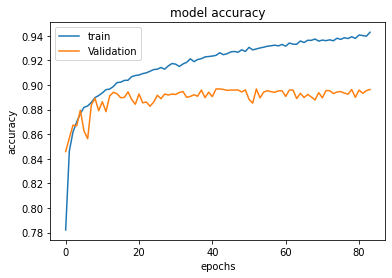

Sai số kiểm tra là:  1.0029346942901611
Độ chính xác kiểm tra là:  0.8901000022888184


In [ ]:
#import thư viện
import numpy as np
import pandas as pd
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping
from keras.backend import dropout
#chia tập dữ liệu thành 2 tập train và test
(x_train, y_train),(x_test,y_test) = fashion_mnist.load_data()
#chuyển x_train,x_test từ 3 chiều thành 2 chiều
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)
#chuyển y từ 1 class thành 10 class
y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)
#chuẩn hóa dữ liệu đầu vào
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /=255
x_test /=255
#tạo mạng noron
model = Sequential()
model.add(Dense(512,activation='relu',input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))
model.summary()
#chạy mạng noron
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(), metrics=['accuracy'])
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(), metrics=['accuracy'])
from keras.callbacks import EarlyStopping
history = model.fit(x_train,y_train,batch_size=128,epochs=500,verbose=1,
validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',patience=70)])
# vẽ lại quá trình học
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','Validation'])
plt.show()
#đánh giá mô hình
score = model.evaluate(x_test,y_test,verbose=0)
print('Sai số kiểm tra là: ',score[0])
print('Độ chính xác kiểm tra là: ',score[1])

In [ ]:
from tensorflow.keras.models import load_model
# model.save('Final_fashion.h5')
model_ANN = load_model('Final_fashion.h5')

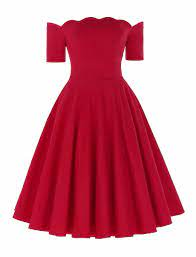

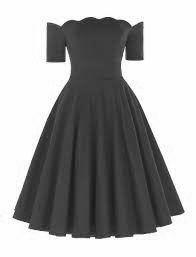

array([8])

In [ ]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
from google.colab.patches import cv2_imshow
import cv2
filename = "dress.png"
img = cv2.imread(filename, cv2.IMREAD_UNCHANGED)
cv2_imshow(img)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

dim = (28, 28)
# img_new = load_img(gray,target_size=(32,32))
resized = cv2.resize(gray, dim, interpolation = cv2.INTER_AREA)
cv2_imshow(resized)

img = img_to_array(resized)
img = img.reshape(1,28*28)
img = img.astype('float32')
# img = img/255

np.argmax(model_ANN.predict(img),axis=-1)

In [ ]:
resized.shape

(28, 28)

In [ ]:
img.shape

(1, 784)

In [ ]:
gray.shape

(257, 196)